In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from sklearn.cluster import MiniBatchKMeans
import matplotlib as mpl

from sklearn.cluster import KMeans

In [35]:
f = open("features3.txt", "r")
lines = f.readlines()
f.close()

X = []
y = []
for line in lines:
    feature = line.split(" : ") 
    name = feature[0]
    feature = feature[1].replace("\n","").replace("[","").replace("]","").split(",")
    feature = [float(i) for i in feature]
    feature.pop(0)

    X.append(feature)
    y.append(name)

In [36]:
from sklearn.preprocessing import MaxAbsScaler
transformer = MaxAbsScaler().fit(X)
X = transformer.transform(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

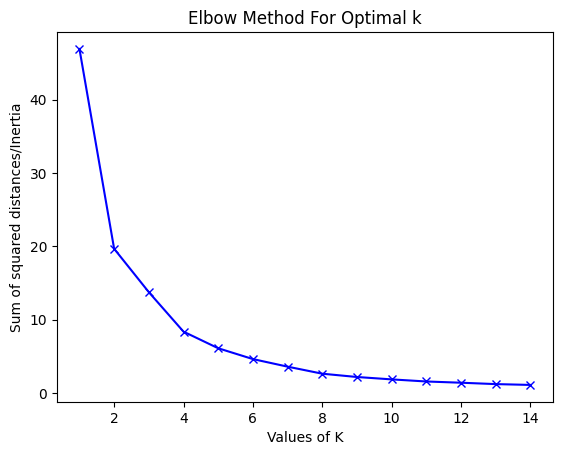

In [37]:
#Elbow plot for kmeans
Sum_of_squared_distances = []
K = range(1,15)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances, 'bx-')
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

In [38]:
#Initialize the class object
kmeans = KMeans(n_clusters= 6)
 
#predict the labels of clusters.
label = kmeans.fit_predict(X)
 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


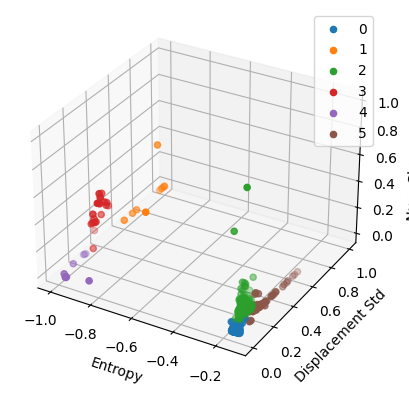

In [39]:
#Getting unique labels
 
u_labels = np.unique(label)
 
 #plotting the results:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Entropy')
ax.set_ylabel('Displacement Std')
ax.set_zlabel('Num Clusters Std')

#plotting the results:
X = np.array(X)
for i in u_labels:
    ax.scatter(X[label == i , 2] , X[label == i , 0] , X[label ==i, 1], label = i)
plt.legend()
plt.show()

In [34]:
# -*- coding: utf-8 -*-
"""CA_clustering.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1uEIDD3O5yHDal2o5dCB7tV9CyHeXfQlW
"""
import numpy as np
import random
from PIL import Image
import time
import cv2
import matplotlib.pyplot as plt
import os
import imageio
from scipy.stats import entropy
from scipy.spatial.distance import cdist



class Rule:
    base_states = [i for i in range(0,9)]
    def __init__(self,states,death_rule,survival_rule,birth_rule,color_map):
        self.states = states
        self.death_rule = death_rule
        self.survival_rule = survival_rule
        self.birth_rule =birth_rule
        self.color_map=color_map

    def gen_name(self):
        #name = ''.join([str(i) for i in self.death_rule]) + '-' + ''.join([str(i) for i in self.survival_rule]) + '-' + ''.join([str(i) for i in self.birth_rule])
        name = ''.join(map(str, self.death_rule)) + '-' + ''.join(map(str, self.survival_rule)) + '-' + ''.join(map(str, self.birth_rule))
       # print("name: ",name)
        return name
    def randomize(self):
        self.death_rule =[i for i in range(0,9) if random.randint(0,10)%4== 0]
        self.survival_rule =[i for i in range(0,9) if random.randint(0,10)%4 == 0]
        self.birth_rule =[i for i in range(0,9) if random.randint(0,10)%4 == 0]

        if(len(self.death_rule) == 0):
            self.death_rule = [random.randint(0,8)]
        if(len(self.survival_rule) == 0):
            self.survival_rule = [random.randint(0,8)]
        if(len(self.birth_rule) == 0):
            self.birth_rule = [random.randint(0,8)]



color_map = {
    0: (0, 0, 0),
    1: (255, 120, 255),
    2: (0, 0, 255),
    3: (255, 255, 0),
    4: (255, 0, 255),
    5: (0, 255, 255),
    6: (128, 0, 0),
    7: (0, 128, 0),
    8: (0, 0, 128)
}

class Grid:
    def __init__(self,rule):
        self.grid = np.zeros((100,100))
        self.rule = rule
    def update(self):
        new_grid = np.zeros(self.grid.shape)
        for i in range(self.grid.shape[0]):
            for j in range(self.grid.shape[1]):
                # Get the indices of the neighbors, wrapping around at the edges
                i_prev = (i-1) % self.grid.shape[0]
                i_next = (i+1) % self.grid.shape[0]
                j_prev = (j-1) % self.grid.shape[1]
                j_next = (j+1) % self.grid.shape[1]                   


                neighborhood = np.array([self.grid[i_prev][j_prev], self.grid[i_prev][j], self.grid[i_prev][j_next],
                                        self.grid[i][j_prev],   self.grid[i][j],   self.grid[i][j_next],
                                        self.grid[i_next][j_prev], self.grid[i_next][j], self.grid[i_next][j_next]])

                
                neighborhood = neighborhood.reshape(3,3)

                # Update the cell based on the neighborhood
                new_grid[i,j] = self.generate(neighborhood,self.rule.states,self.rule.death_rule,self.rule.survival_rule,self.rule.birth_rule)

        self.grid = new_grid
    def get_grid(self):
        return(self.grid)
    def clear_grid(self):
      self.grid = np.zeros((100,100))
    def get_display(self):
        out =  np.zeros((self.grid.shape[0], self.grid.shape[1], 3), dtype=np.uint8)
        for i in range(1,self.grid.shape[0]-1):
            for j in range(1,self.grid.shape[1]-1):
              out[i][j] = self.rule.color_map[self.grid[i][j]]
        out = Image.fromarray(out)
        out = out.resize((400,400))
        return(out)
    def populate(self,population):
      for i in range(population):
        randy = random.randint(0,self.grid.shape[0]-1)
        randx = random.randint(0,self.grid.shape[1]-1)
        self.grid[randy][randx] =  self.rule.states[-1]

    def generate(self,neighborhood,states,death_rule,survival_rule, birth_rule):
        cell = neighborhood[1][1]
        live_cells = 0
        for i in range(3):
            for j in range(3):
                if i == 1 and j == 1:
                    continue
                if neighborhood[i][j] == states[-1]:
                    live_cells += 1
        #case 1 cell is alive
        if(cell == states[-1]):
            if(live_cells in survival_rule):
                return(cell)
            elif(live_cells in death_rule):
                return(states[0])
            else:
                return(states[states.index(cell)-1])
        #case2 cell is dying
        elif(cell != states[0]):
            return(states[states.index(cell)-1])
        #case 3 cell is dead
        else:
            if(live_cells in birth_rule):
                return(states[-1])
            else:
                return(cell)
            
class Manager:
    def __init__(self,grid):
        self.grid = grid
        self.grid.populate(500)
    
    def regen(self):
        self.grid.clear_grid()
        self.grid.populate(500)
        self.grid.rule.randomize()
    def cluster(self,image):
        # Load the image
        img = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)


        # Threshold the image to binarize it
        _, thresh = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

        # Perform connected component analysis to obtain the clusters
        num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, connectivity=8)

        # Sort the clusters by size (largest to smallest)
        sizes = stats[:, -1]
        sorted_idxs = np.argsort(sizes)[::-1]
        sorted_labels = np.zeros_like(labels)
        for i, idx in enumerate(sorted_idxs):
          sorted_labels[labels == idx] = i + 1

        # Apply a color map to the labeled image
        num_labels = np.max(sorted_labels) + 1
        colors = plt.cm.get_cmap('rainbow', num_labels)
        colored_labels = colors(sorted_labels)[:, :, :3] * 255
        colored_labels = colored_labels.astype(np.uint8)

        colored_labels = cv2.resize(colored_labels, (0, 0), fx = 3, fy = 3)

        #print(set(labels.flatten()))

        return [centroids,len(set(labels.flatten()))-1]
    def calculate_fitness(self,generations):
        avg_displacement = []
        avg_clusters = []
        prev_centroids, prev_clusters = self.cluster(self.grid.get_display())
        for i in range(50):
            self.grid.update()
        generations-=50
        for i in range(generations):
            self.grid.update()
            centroids, num_clusters = self.cluster(self.grid.get_display())
            #displacement = [np.linalg.norm(centroids[j] - prev_centroids[j]) for j in range(min(len(prev_centroids),len(centroids)))]
            #displacement = abs(centroids - prev_centroids)
            displacement = cdist(centroids, prev_centroids, 'cityblock')

            avg_displacement.append(np.mean(displacement))      

            avg_clusters.append(num_clusters)

            prev_centroids = centroids
            prev_clusters = num_clusters

            #self.save_image(str(i))
        #print(centroids)
        #print(num_clusters)
        displacement_std = np.std(avg_displacement)
        displacement_mean = np.mean(avg_displacement)
        num_clusters_std = np.std(avg_clusters)

        counts = np.bincount(self.grid.grid.flatten().astype(int))
        probs = counts / float(generations)
        entropy = - np.sum([p * np.log2(p) for p in probs if p > 0])
        #entropy = np.sum(probs * np.log(probs/probs)) / np.log(2)
        # entropy = scipy.stats.entropy(probs)
        return [displacement_mean,displacement_std,num_clusters_std,entropy]
    def save_image(self,name):
        path = self.grid.rule.gen_name()
        isExist = os.path.exists(path)
        if not isExist:

            # Create a new directory because it does not exist
            os.makedirs(path)
        self.grid.get_display().save(path +"/" + name + ".png")

import glob
def make_gif(frame_folder,name):
    frames = [Image.open(image) for image in glob.glob(f"{frame_folder}/*.JPG")]
    frame_one = frames[0]
    frame_one.save(name, format="GIF", append_images=frames,
               save_all=True, duration=300, loop=0)


#states/death/survial/birth
game_of_life = Rule([0,1], [1,4], [2,3],[3],color_map)

test = Grid(game_of_life)

manager = Manager(test)

In [ ]:
#Generate fitness values and save themn to a file
start = time.time()
f = open("features3.txt", "a")
for i in range(1000):

    f.write(manager.grid.rule.gen_name())
    f.write(" : ")
    f.write(str(manager.calculate_fitness(200)))
    f.write("\n")

    manager.regen()
    if(i%50 == 0):  
        print(time.time()-start)
        start = time.time()
    #print(manager.grid.rule.gen_name())
f.close()

In [ ]:
#Generate gifs from a text file that has the form X : X-X-X
#where X is an integer
f = open("clusters.txt", "r")
lines = f.readlines()
f.close()

for line in lines:
    feature = line.split(" : ") 
    cluster = feature[0]
    if(cluster == "0" or cluster =="1" or cluster == "2" or cluster == "3" or cluster =="4"):
        continue
    rule_name = feature[1].replace("\n","")
    feature = feature[1].replace("\n","").split("-")
    death = [int(i) for i in feature[0]]
    survival = [int(i) for i in feature[1]]
    birth = [int(i) for i in feature[2]]

    test = Grid(Rule([0,1],death,survival,birth,color_map))
    test.populate(2000)


    for i in range(200):
        test.update()
        if(i<10):
            test.get_display().save("temp/test"+"00"+str(i)+".JPG")
        elif(i<100):
            test.get_display().save("temp/test"+"0"+str(i)+".JPG")
        else:
            test.get_display().save("temp/test"+str(i)+".JPG")
    try:
        make_gif("temp","gifs/"+cluster+"_"+rule_name+".gif")
    except:
        print("error")